### Importing python lisp-wrapper
We need to import the modified version of py2lispIDyOM from the "py2lisp" directory. This version introduces the option to use a "harmony" texture instead of the default "melody" setting. This modification allows IDyOM to retrieve harmonic sequences, which are essential for generating predictions, information content (IC), and entropy using the harmonic viewpoints available in IDyOM.

In [63]:
from py2lisp.run import IDyOMExperiment

### Importing midi data
The extraction of harmonic sequences relies on simultaneous musical events. Therefore, we converted Cocopops harm data into Kern format, and subsequently into MIDI format. To initiate an experiment, we first specify the folder containing the MIDI files.

In [64]:
my_experiment = IDyOMExperiment(test_dataset_path='data/small_kern_subset/')

** Putting Test dataset files in experiment history folder. **
** No pretraining dataset detected. **


### Idyom Parameters 
Next, we set up the IDyOM parameters, including the source and target viewpoints, as well as the model configuration (LTM, STM, or both). For list of available harmonic viewpoints see (https://github.com/frshdjfry/py2lispIDyOMJupyter).


In [65]:
my_experiment.set_parameters(target_viewpoints=['cpitch'],
                             source_viewpoints=['cpitch'],
                             models=':both',
                             k=1,
                             texture=':melody',
                             detail=3)

### Calculation
The results of the experiment will be stored in the experiment_history folder, with the folder name reflecting the date and time of the experiment.

In [66]:
my_experiment.run()

** running lisp script **
To load "clsql":
  Load 1 ASDF system:
    clsql
; Loading "clsql"

To load "idyom":
  Load 1 ASDF system:
    idyom
; Loading "idyom"
.........

Inserting 5 compositions into database: dataset 66022025183500.
| Progress: -----------------------------------------------|
/root/idyom/data/resampling/66022025183500-1.resample.
Written PPM* model to /root/idyom/data/models/cpitch_NIL_66022025183500-1:1_melody.ppm.
 
** Finished! **


### Reading the result
Results of the calculation are stored in the 'experiment_history' folder. Locate the latest experiment folder and, within it, find the 'experiment_output_data_folder'. The .dat file contains the probability distributions, entropy, and information content.

In [68]:
import pandas as pd

output_path = 'experiment_history/20-02-25_18.34.57/experiment_output_data_folder/66022025183500-cpitch-cpitch-nil-nil-melody-nil-1-both-nil-t-nil-c-nil-t-t-x-3.dat'

df = pd.read_csv(output_path, delimiter='\s+', na_values='NA')



### Plot the values

Now we can select a song or dataset to analyze by their name or id. 

In [74]:
song_name = "shanx001"
filtered_df = df[df['melody.name'] == song_name]
filtered_df['note.id'] = filtered_df['note.id'].astype(int)
filtered_df


/tmp/ipykernel_447/1230240505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['note.id'] = filtered_df['note.id'].astype(int)


,dataset.id,melody.id,note.id,melody.name,vertint12,articulation,comma,voice,ornament,dyn,...,cpitch.78,cpitch.79,cpitch.81,cpitch.83,cpitch.86,cpitch.88,probability,ic,entropy,information.gain
0,66022025183500,1,1,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,4.087463,4.087462,NaN
1,66022025183500,1,2,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.046393,0.046393,0.046393,0.257710,0.046393,0.046393,0.257710,1.956182,3.792431,0.196966
2,66022025183500,1,3,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.046393,0.046393,0.046393,0.257710,0.046393,0.046393,0.257710,1.956182,3.792431,0.000000
3,66022025183500,1,4,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.020143,0.020143,0.020143,0.677716,0.020143,0.020143,0.677716,0.561248,2.195985,0.533969
4,66022025183500,1,5,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.014813,0.014813,0.014813,0.762988,0.014813,0.014813,0.762988,0.390268,1.738085,0.027017
5,66022025183500,1,6,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.011793,0.011793,0.011793,0.811306,0.011793,0.011793,0.011793,6.405877,1.453510,0.010366
6,66022025183500,1,7,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.028376,0.028376,0.206827,0.367541,0.028376,0.028376,0.206827,2.273505,3.188375,0.653979
7,66022025183500,1,8,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.009709,0.009709,0.540467,0.313903,0.009709,0.009709,0.009709,6.686513,1.978263,0.455612
8,66022025183500,1,9,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.021773,0.152586,0.271294,0.271294,0.021773,0.021773,0.021773,5.521302,3.118080,0.406515
9,66022025183500,1,10,shanx001,NaN,NaN,NaN,1,NaN,NaN,...,0.028956,0.118574,0.193215,0.193215,0.028956,0.028956,0.028956,5.110011,3.569531,0.151543


In [70]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_entropy_and_ic(df):
    # Compute event index and extract metrics.
    event_index = df['note.id'] - 1
    entropy = df['entropy']
    information_content = df['ic']
    
    # Create a figure with two subplots sharing the x-axis.
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
    
    # Plot Uncertainty (Entropy)
    ax1.plot(event_index, entropy, 'r-', marker='o')
    ax1.set_title('Uncertainty (Entropy) and Surprise (Information Content) of Events')
    ax1.set_ylabel('Uncertainty (Entropy)')
    ax1.grid(True)
    ax1.set_yticks([0, 4, 8])
    ax1.set_ylim([0, 10])
    
    # Plot Surprise (Information Content)
    ax2.plot(event_index, information_content, 'b-', marker='o')
    ax2.set_ylabel('Surprise (Information Content)')
    ax2.set_xlabel('Event Index')
    ax2.grid(True)
    ax2.set_yticks([0, 5, 10, 15])
    ax2.set_ylim([0, 15])
    
    # Ensure the x-axis displays only integer labels.
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
     
    plt.tight_layout()
    plt.show()


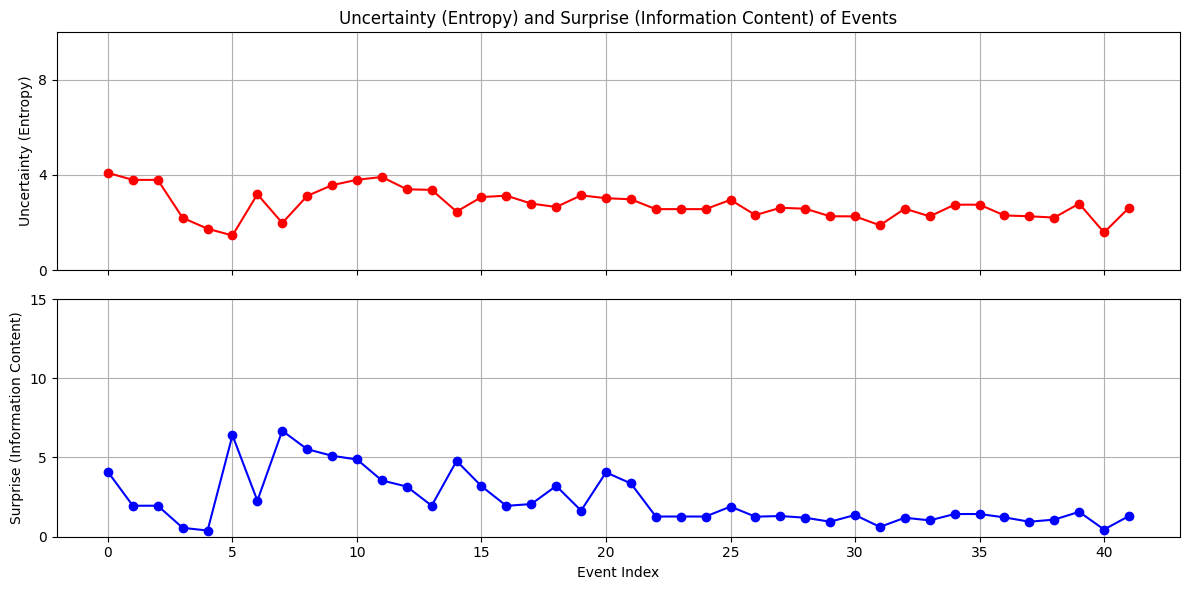

In [71]:
plot_entropy_and_ic(filtered_df)

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

def plot_prob_dists(df, prefix, figsize=(12, 8), cmap='viridis', annot=False):
    # Compile regex to match columns that start with the given prefix followed by a number.
    pattern = re.compile(r'^' + re.escape(prefix) + r'\d+$')
    probability_columns = [col for col in df.columns if pattern.match(col)]
    
    if not probability_columns:
        print(f"No columns found with the pattern '{prefix}<number>'.")
        return
    
    # Extract the probability distribution data and transpose it.
    probability_data = df[probability_columns].T
    
    # Create the plot.
    plt.figure(figsize=figsize)
    ax = sns.heatmap(probability_data, cmap=cmap, annot=annot, cbar=True)
    
    # If 'note.id' exists, use it to set x-axis tick labels.
    if 'note.id' in df.columns:
        # Create x-axis labels from 'note.id' (subtract 1 as in your example).
        x_labels = (df['note.id'] - 1).tolist()
        ax.set_xticklabels(x_labels, rotation=0)
    
    ax.set_xlabel("Event Index")
    ax.set_ylabel(f"{prefix}<number> Columns")
    ax.set_title("Probability Distribution Heatmap (Event Index on X-axis)")
    plt.tight_layout()
    plt.show()



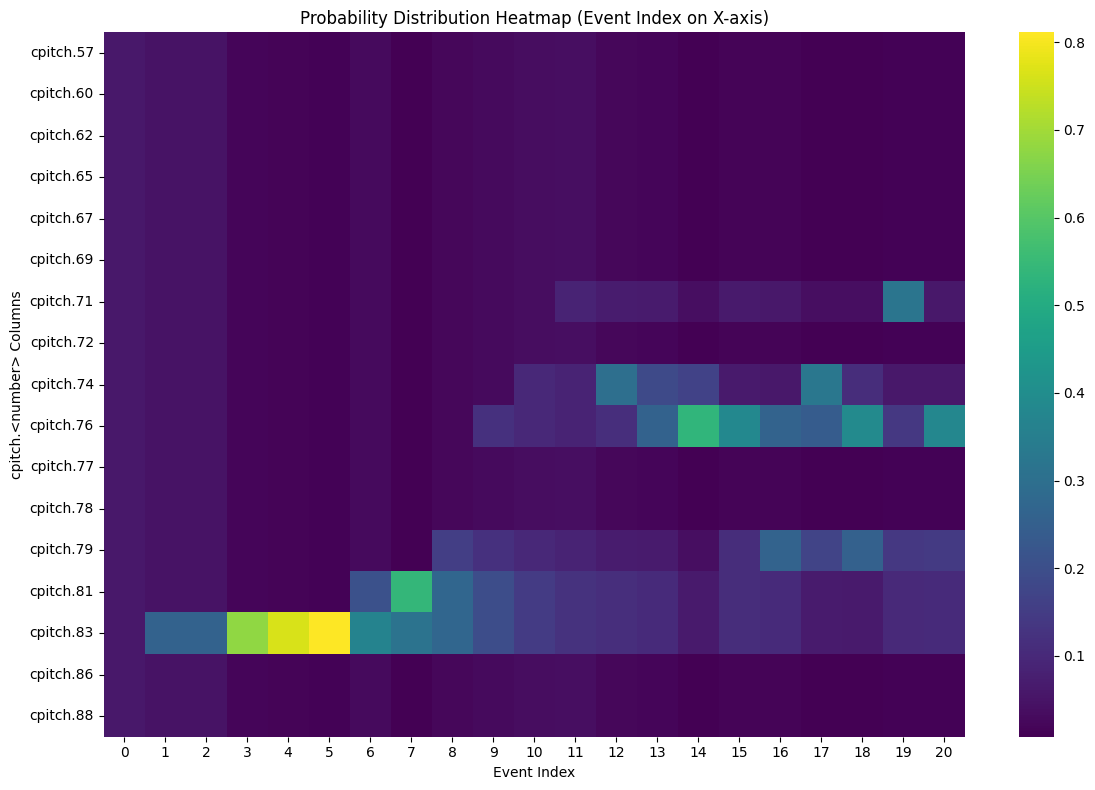

In [76]:
plot_prob_dists(filtered_df, 'cpitch.')